In [1]:
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
from matplotlib import pyplot as plt


In [2]:
pip install keras

In [3]:
import tensorflow as tf
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

# Load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

from keras import backend as K

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
n=10
bs=64
epochs=24
rows,cols=28,28

In [5]:
X_train.shape
X_test.shape

(10000, 28, 28)

In [6]:
X_train=X_train.reshape(X_train.shape[0],rows,cols,1)
X_test=X_test.reshape(X_test.shape[0],rows,cols,1)
shape=(rows,cols,1)

In [7]:
X_train=X_train.astype("float")
X_test=X_test.astype("float")
X_train/=255
X_test/=255
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [8]:
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)
print(y_train[0:3])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [9]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D

In [10]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="softmax"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [12]:
hist=model.fit(X_train,y_train,batch_size=64,epochs=24,verbose=1,validation_data=(X_test,y_test))

Epoch 1/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.2482 - loss: 2.0452 - val_accuracy: 0.5124 - val_loss: 1.5594
Epoch 2/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3145 - loss: 1.7060 - val_accuracy: 0.6483 - val_loss: 1.3074
Epoch 3/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3940 - loss: 1.5445 - val_accuracy: 0.7473 - val_loss: 1.0775
Epoch 4/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.4394 - loss: 1.4375 - val_accuracy: 0.8301 - val_loss: 0.9024
Epoch 5/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5402 - loss: 1.2656 - val_accuracy: 0.8425 - val_loss: 0.7476
Epoch 6/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5420 - loss: 1.1909 - val_accuracy: 0.8730 - val_loss: 0.6433
Epoch 7/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5820 - loss: 1.1185 - val_accuracy: 0.8852 - val_loss: 0.5653
Epoch 8/24
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6132 - loss: 1.0510 - val_accuracy: 0

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 363,008 (1.38 MB)

 Trainable params: 121,002 (472.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 242,006 (945.34 KB)

In [14]:
score=model.evaluate(X_test,y_test,verbose=0)
print("Test Loss",score[0])
print("Test Accuracy",score[1])
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Test Loss 0.2773757576942444
Test Accuracy 0.9089999794960022


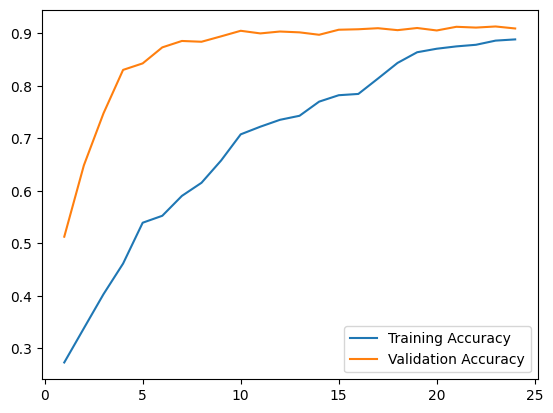

In [15]:
el=list(range(1,len(hist.history["accuracy"])+1))
plt.plot(el,hist.history["accuracy"],el,hist.history["val_accuracy"])
plt.legend(["Training Accuracy","Validation Accuracy"])
plt.show()

In [16]:
print(el)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


In [17]:
print(hist.history["accuracy"])
print(hist.history["val_accuracy"])

[0.2727999985218048, 0.3379499912261963, 0.40283334255218506, 0.4611833393573761, 0.5389999747276306, 0.552216649055481, 0.5900999903678894, 0.615066647529602, 0.6575166583061218, 0.7073500156402588, 0.7218999862670898, 0.7350000143051147, 0.7426999807357788, 0.7696333527565002, 0.7818666696548462, 0.7843000292778015, 0.8135833144187927, 0.8433833122253418, 0.8637166619300842, 0.8704166412353516, 0.8748666644096375, 0.8779333233833313, 0.885866641998291, 0.8881833553314209]
[0.5123999714851379, 0.6482999920845032, 0.7473000288009644, 0.8300999999046326, 0.8424999713897705, 0.8730000257492065, 0.885200023651123, 0.8837000131607056, 0.8939999938011169, 0.9046000242233276, 0.8996000289916992, 0.9031999707221985, 0.9016000032424927, 0.8970000147819519, 0.9065999984741211, 0.9075000286102295, 0.909500002861023, 0.9057999849319458, 0.9099000096321106, 0.9052000045776367, 0.9121999740600586, 0.9107000231742859, 0.9128000140190125, 0.9089999794960022]


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 363,008 (1.38 MB)

 Trainable params: 121,002 (472.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 242,006 (945.34 KB)